In [3]:
#casestudy

#Input features:( Runs =R, At Bats = AB, Hits=H, Doubles=2B Triples=3B, Homeruns=HR, Walks=BB,
   #Strikeouts=SO,Stolen Bases=SB, Runs Allowed RA, Earned Runs=ER, Earned Run Average = ERA, CG, Shutouts=SHO,Saves=SV, and Errors=E)



#Output: Number of predicted wins (W)

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv("baseball_pred")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [18]:
df.shape

(30, 17)

In [20]:
#EDA process

df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [21]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [22]:
#checking the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

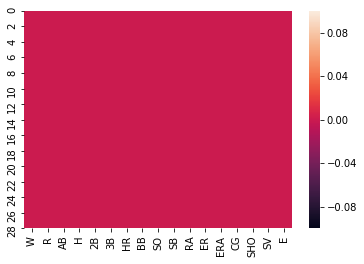

In [36]:
sns.heatmap(df.isnull())

In [23]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [24]:
df.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [26]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [29]:
df=pd.DataFrame(data=df)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [31]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


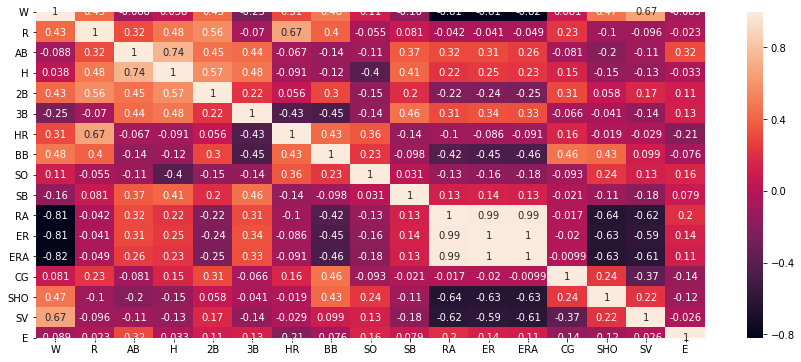

In [38]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor, color="Blue", annot=True)

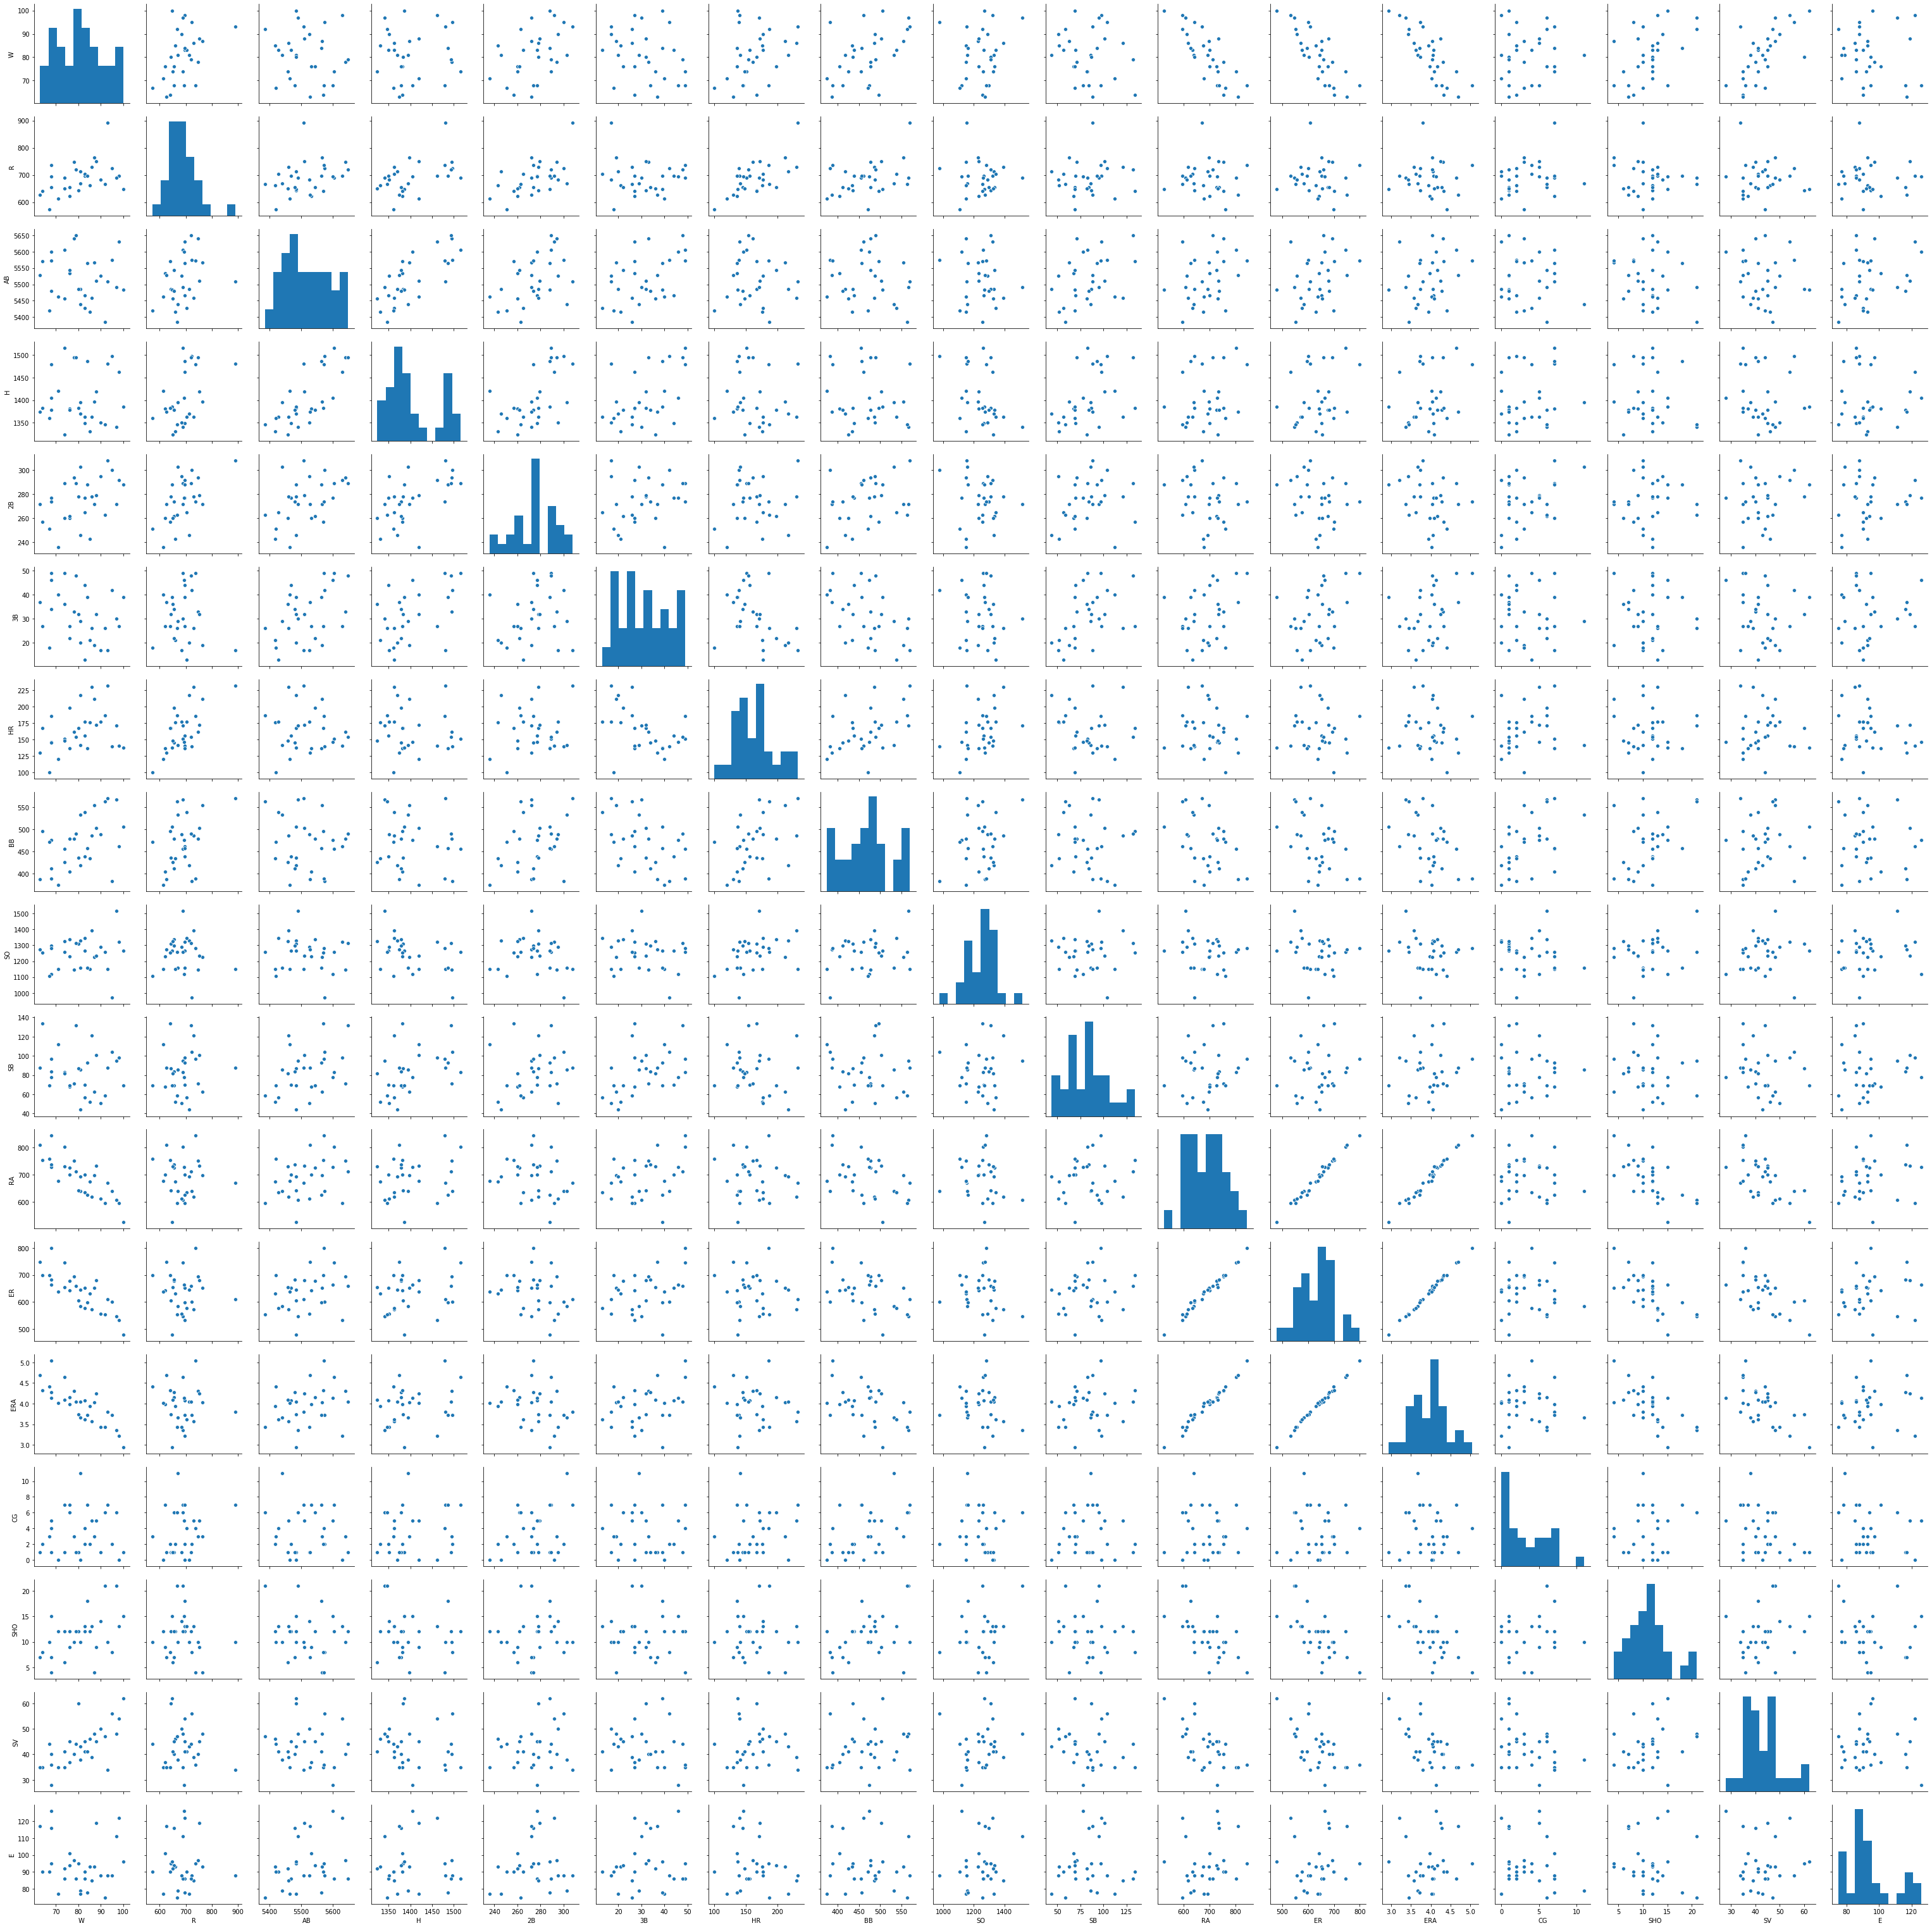

In [39]:
sns.pairplot(df)

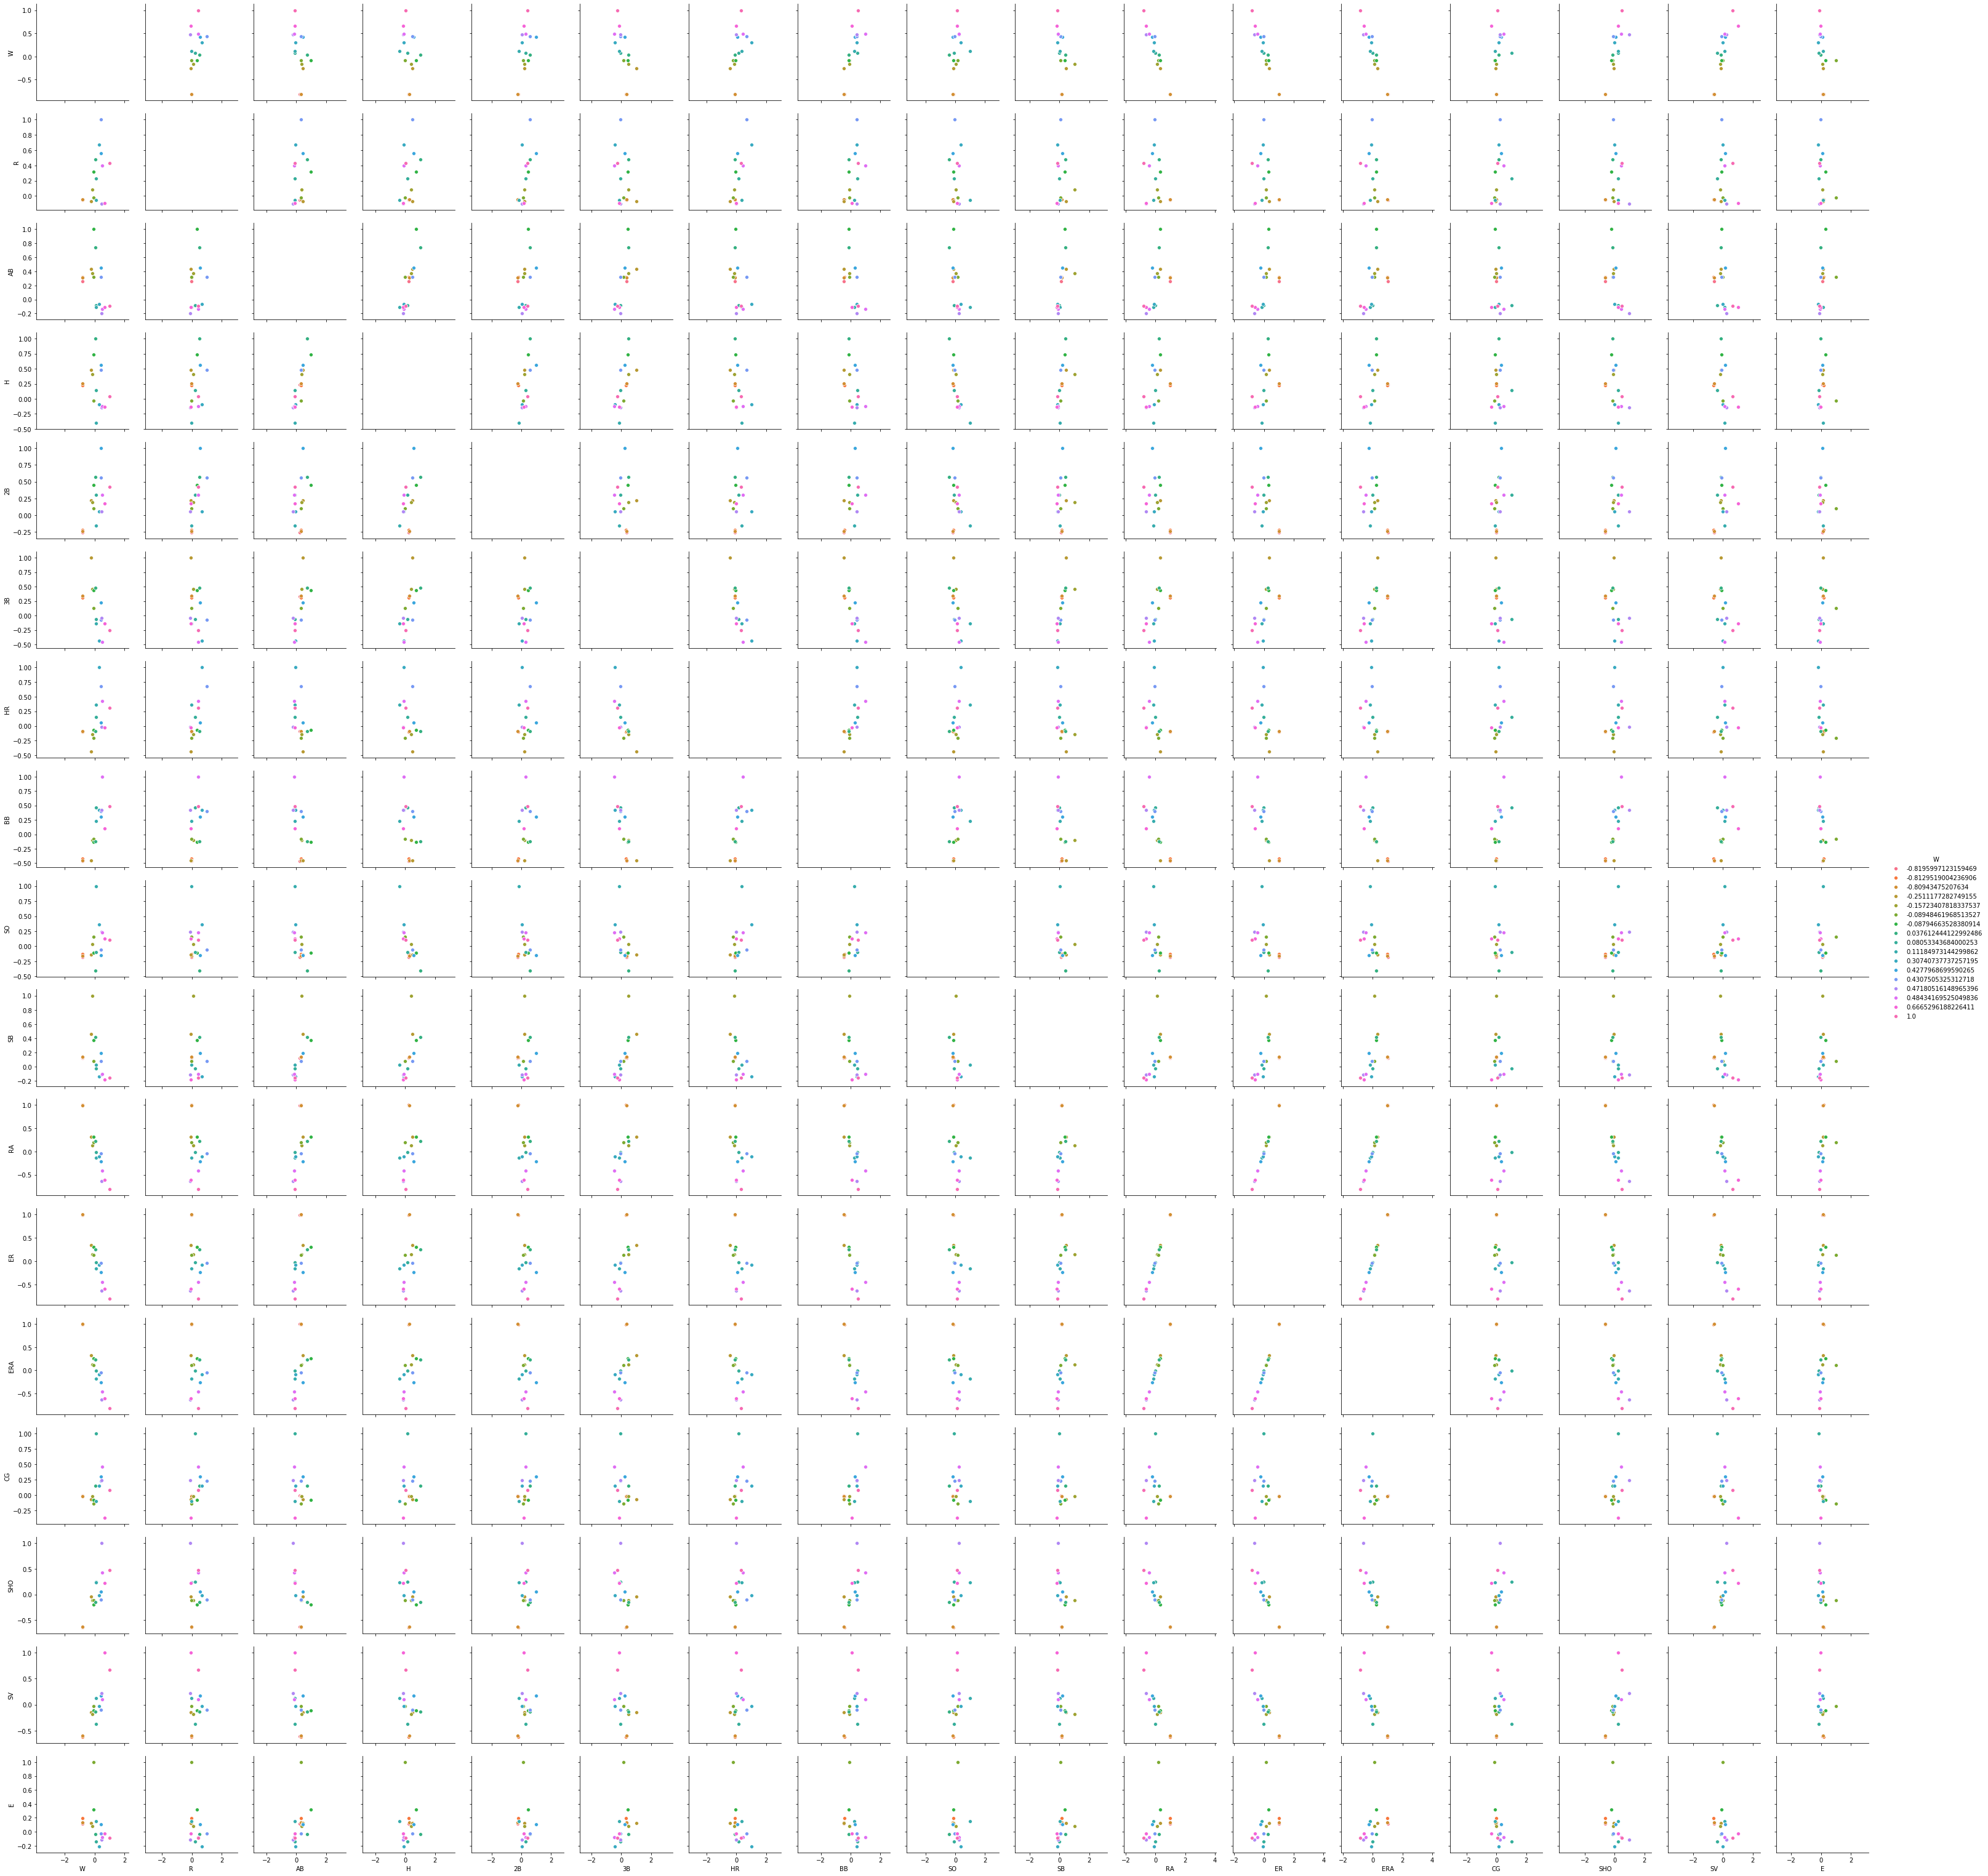

In [40]:
sns.pairplot(dfcor, hue="W" )

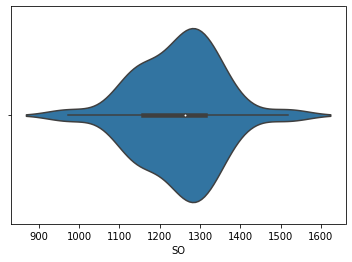

In [41]:
sns.violinplot(x="SO",data=df)

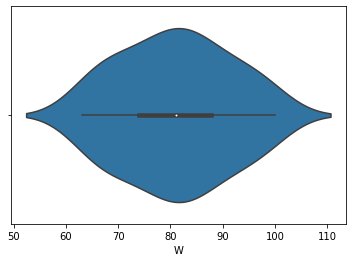

In [42]:
sns.violinplot(x="W",data=df)

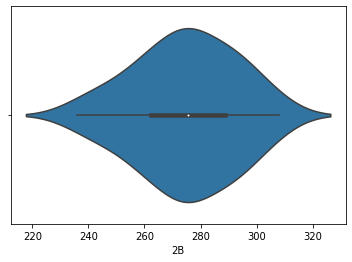

In [43]:
sns.violinplot(x="2B",data=df)

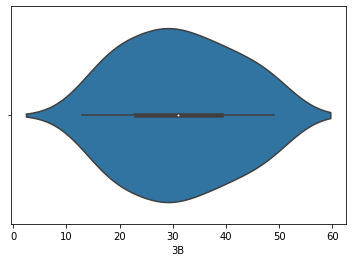

In [44]:
sns.violinplot(x="3B",data=df)

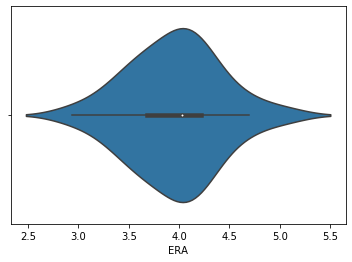

In [45]:
sns.violinplot(x="ERA",data=df)

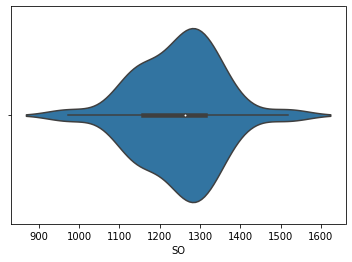

In [46]:
sns.violinplot(x="SO",data=df)

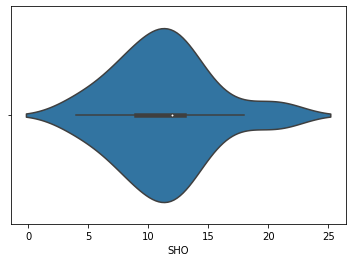

In [47]:
sns.violinplot(x="SHO",data=df)

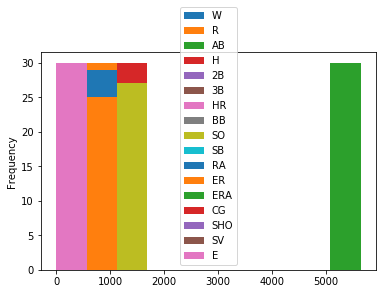

In [49]:
df.plot.hist()

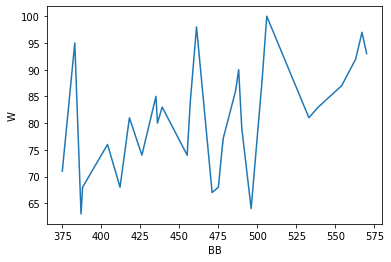

In [52]:
#line plot

sns.lineplot(df["BB"],df["W"])
plt.show()

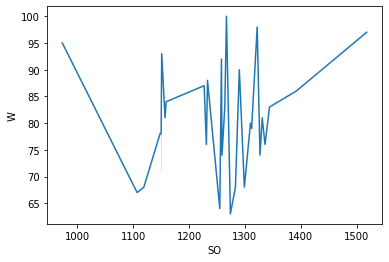

In [53]:
sns.lineplot(df["SO"],df["W"])
plt.show()

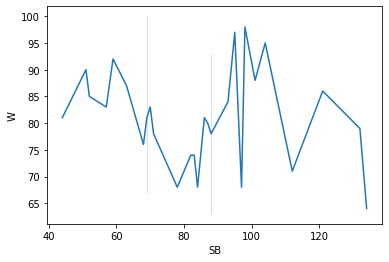

In [54]:
sns.lineplot(df["SB"],df["W"])
plt.show()

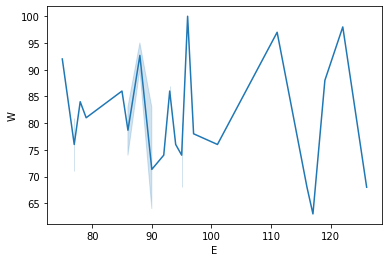

In [56]:
#Lets check the how Erros is changing with rsp Win
sns.lineplot(df["E"],df["W"])
plt.show()

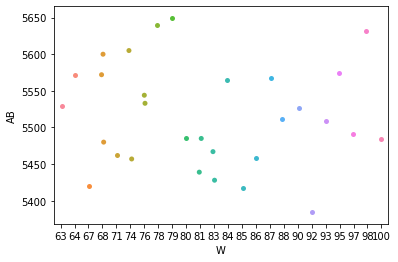

In [57]:

ax=sns.stripplot(x='W',y="AB",data=df);

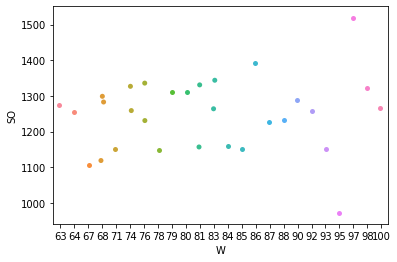

In [58]:

ax=sns.stripplot(x='W',y="SO",data=df);

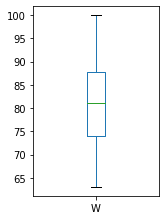

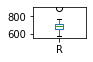

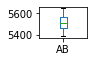

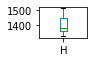

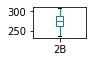

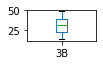

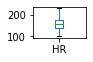

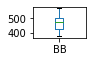

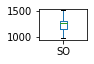

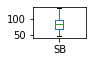

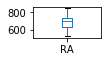

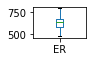

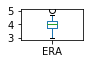

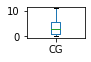

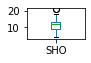

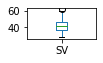

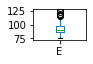

In [60]:
#box plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

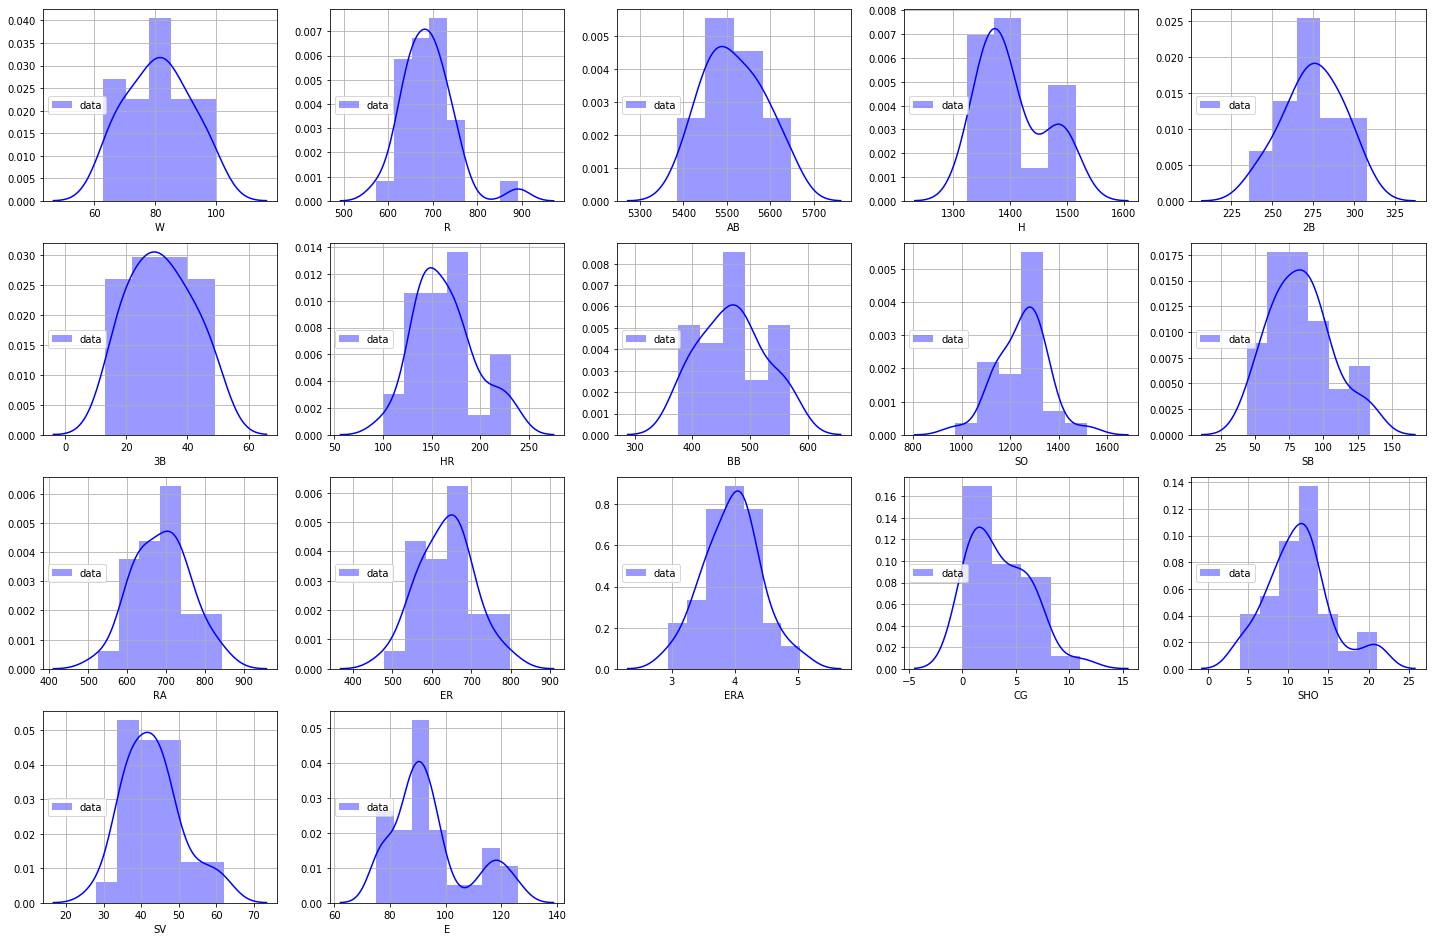

In [64]:
#Disti plot through iteration

plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='b',kde=True,label='data')
    plt.grid()
    plt.legend(loc='center left')
    plt.tight_layout()

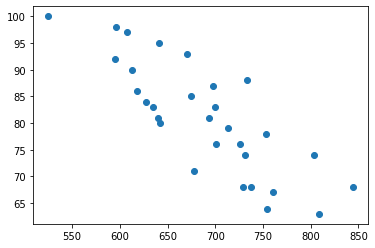

In [65]:
#scatter plot

plt.scatter(df['RA'],df['W'])

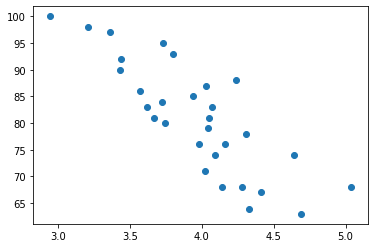

In [66]:
plt.scatter(df['ERA'],df['W'])

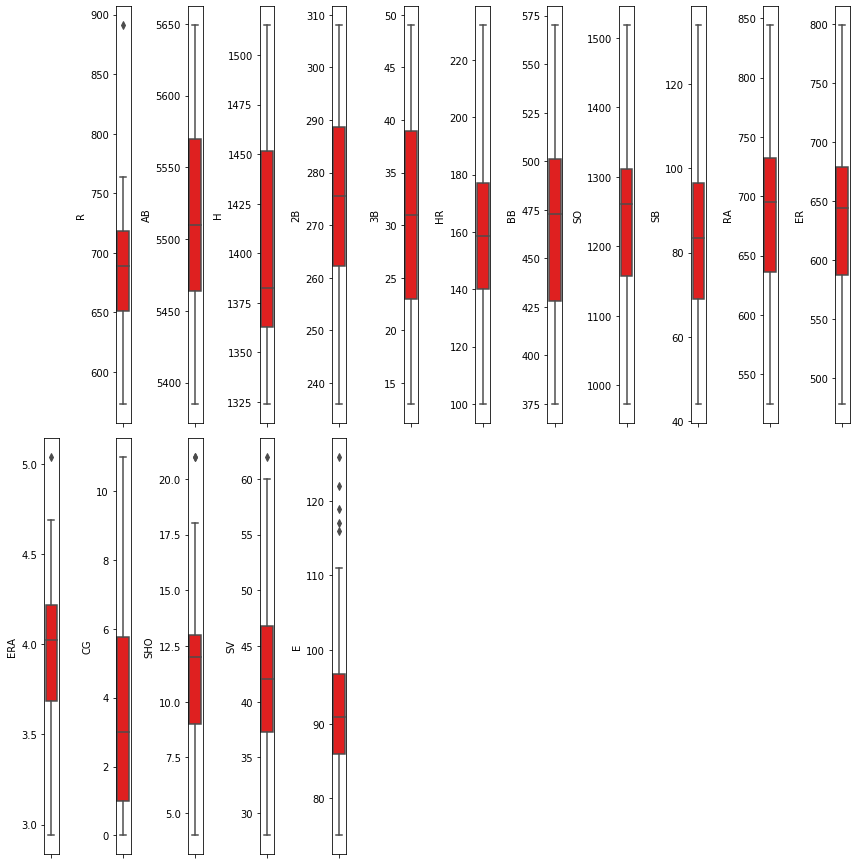

In [67]:
#column Plot
collist = df.columns.values
ncols=12
nrows=10
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

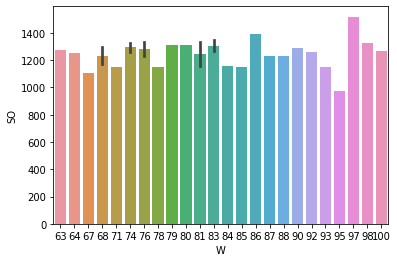

In [85]:
sns.barplot(df["W"], df["SO"])

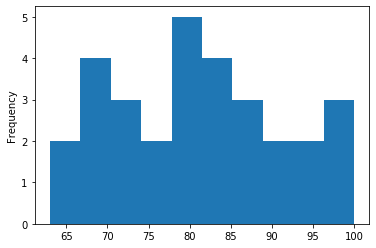

In [89]:

df['W'].plot.hist()

In [90]:
#finding the skewness of the dataset

df.skew()

W      0.047089
R      0.645220
AB     0.183437
H      0.619842
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.093545
SV     0.163057
E      0.547824
dtype: float64

In [91]:
#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()
       

W      0.047089
R      0.644216
AB     0.183437
H      0.619757
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.093545
SV     0.163057
E      0.547824
dtype: float64

In [92]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (30, 17)
df1.shape: (29, 17)
z value is: [[1.3654086  0.67459117 0.84773126 1.64634703 1.42017307 1.04119304
  0.7872986  1.53490242 2.69762957 0.91388329 0.66623393 0.50511008
  0.50695519 0.27892148 0.78956514 1.58127344 0.41444943]
 [0.1978383  0.1897352  0.71109353 0.98390666 0.12740339 1.23580856
  0.24396668 0.5365919  0.15487844 0.60182558 0.16597077 0.24892985
  0.25459752 0.27892148 0.26795297 0.336185   0.58469932]
 [0.00324325 0.30107411 1.1152333  0.13049725 1.58879521 0.22380785
  0.7233772  1.13914361 0.89398189 0.11144918 0.68033909 0.75162313
  0.64134684 1.76277761 0.23271227 0.62244106 1.22384106]
 [0.48324437 1.21653342 0.24152162 0.38658971 0.82812203 0.41842337
  0.8831807  1.16053598 0.16860185 0.69098493 0.18007593 0.10392217
  0.05301004 1.16561891 0.50325831 0.77328196 0.58169339]
 [0.67783942 0.06476584 1.28073815 1.94474613 0.80189192 1.72234737
  0.40377019 0.25136033 0.10586628 0.02228984 1.61880269 1.59750126
  1.53131824 1.16561891 0.26795297 1.

In [117]:
# seperating the x and y values

X = df.drop("W", axis=1)
#Y=df.iloc[:,-1]
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.240416,5575,0.241966,300,42,139,383,973,104,641,601,3.73,1.098612,4.827796,4.043051,0.421919
1,0.240325,5467,0.241758,277,44,156,439,1264,70,700,653,4.07,1.098612,6.578965,3.828641,0.421620
2,0.240232,5439,0.241825,303,29,141,533,1157,86,640,584,3.67,2.484907,5.749902,3.663562,0.420497
3,0.240060,5533,0.241805,260,27,136,404,1231,68,701,643,3.98,2.079442,5.301898,3.637586,0.423670
4,0.240301,5605,0.241989,289,49,151,455,1259,83,803,746,4.64,2.079442,6.578965,3.583519,0.421620
5,0.240884,5509,0.241943,308,17,232,570,1151,88,670,609,3.80,2.079442,5.749902,3.555348,0.421919
6,0.240540,5567,0.241828,272,19,212,554,1227,63,698,652,4.03,1.386294,2.590290,3.891820,0.422630
7,0.240381,5485,0.241789,246,20,217,418,1331,44,693,646,4.05,0.000000,5.749902,3.784190,0.420152
8,0.240142,5485,0.241808,278,32,167,436,1310,87,642,604,3.74,0.693147,6.578965,4.110874,0.422900
9,0.240491,5640,0.241963,294,33,161,478,1148,71,753,694,4.31,1.386294,5.749902,3.713572,0.423164


In [119]:
Y = df["W"]
Y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [120]:
df.shape

(30, 17)

In [121]:
X.shape

(30, 16)

In [122]:
Y.shape

(30,)

In [123]:
Y = Y.values.reshape(-1,1)

In [124]:
Y.shape

(30, 1)

In [125]:
#Applying Linear Regression
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [126]:
train_X.shape


(20, 16)

In [127]:
test_X.shape

(10, 16)

In [128]:
train_Y.shape

(20, 1)

In [129]:
test_Y.shape

(10, 1)

In [130]:
lg= LinearRegression()

In [131]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
lg.coef_

array([[ 5.41109156e+04, -3.84049346e-02, -4.37618703e+03,
        -6.10759240e-02, -1.11501203e-01, -9.00719481e-02,
        -5.75527787e-02,  2.38456003e-03,  1.00240342e-02,
         1.11466622e-01,  4.50583117e-01, -9.81874263e+01,
         4.74567943e+00,  6.78811922e-01,  2.62939015e+01,
         3.56616539e+01]])

In [133]:
lg.intercept_

array([-11693.28318232])

In [134]:
lg.score(train_X,train_Y)

0.9441907166980891

In [139]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result:",pred)
print("actual result",test_Y)

Predicted result: [[58.88967607]
 [88.98084864]
 [76.98504648]
 [78.39946852]
 [69.46432836]
 [98.31624353]
 [61.3538311 ]
 [90.87461525]
 [86.3429779 ]
 [61.03999547]]
actual result [[ 63]
 [ 88]
 [ 81]
 [ 81]
 [ 68]
 [ 93]
 [ 67]
 [100]
 [ 92]
 [ 71]]


In [140]:
from sklearn.metrics import mean_squared_error,r2_score

print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))
print('R2 Score of lg: %.2f' % r2_score(test_Y, pred))

error:
Mean absolute error: 4.88758097555783
Mean sqaured error: 31.750160498726615
Root mean squared error: 5.634728076733305
R2 Score of lg: 0.78


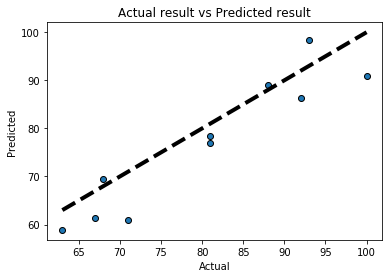

In [141]:
#Lets Visualize the Goodness of the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, pred, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual result vs Predicted result")
plt.show()

In [142]:
# GradientBoostRegressor By using Parameter

from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.9999500168448907
Mean squared error: 87.47
R2 Score: 0.40


In [144]:
#Linear Regression using Recursion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [145]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [146]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.8082077169874884
r2 score corresponding to  43 is -0.6723979688187152
r2 score corresponding to  44 is 0.7777797950706642
r2 score corresponding to  45 is 0.8175826191570983
r2 score corresponding to  46 is 0.4589645059424369
r2 score corresponding to  47 is 0.7256778692150706
r2 score corresponding to  48 is 0.8858054642437516
r2 score corresponding to  49 is -0.07922279970077906
r2 score corresponding to  50 is 0.6114243087105662
r2 score corresponding to  51 is 0.4543524382442894
r2 score corresponding to  52 is 0.5737589440176171
r2 score corresponding to  53 is 0.45436725052955507
r2 score corresponding to  54 is 0.6953516505791806
r2 score corresponding to  55 is 0.8437339278562678
r2 score corresponding to  56 is 0.22984704014891122
r2 score corresponding to  57 is -0.5768469635335325
r2 score corresponding to  58 is 0.21932030139731484
r2 score corresponding to  59 is -0.2590807376318853
r2 score corresponding to  60 is -0.5825844897314378
r2 

In [149]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of knn: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of knn: %.2f' % r2_score(test_Y, predicted))

Mean squared error of knn: 75.15
R2 Score of knn: 0.05


In [150]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 1}

In [151]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=1)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is -0.1133628879037365
r2 score corresponding to  43 is -1.476780185758514
r2 score corresponding to  44 is 0.1853344077356971
r2 score corresponding to  45 is -0.20135746606334837
r2 score corresponding to  46 is -1.6788698766414645
r2 score corresponding to  47 is -0.191747572815534
r2 score corresponding to  48 is 0.2603686635944701
r2 score corresponding to  49 is 0.5847375017407046
r2 score corresponding to  50 is -0.6625965611761773
r2 score corresponding to  51 is -1.4187012987012988
r2 score corresponding to  52 is -0.2549668874172186
r2 score corresponding to  53 is -1.8371278458844134
r2 score corresponding to  54 is -0.22212230215827322
r2 score corresponding to  55 is -0.0045438657811953664
r2 score corresponding to  56 is -1.5320293398533003
r2 score corresponding to  57 is -1.7422796181920268
r2 score corresponding to  58 is 0.04617414248021112
r2 score corresponding to  59 is -1.7785675232367417
r2 score corresponding to  60 is -0.8654042988

In [152]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print("----\n")
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -0.27395821341707016
Standard deviation in r2 score for Linear Regression: 1.6484095480390653
----

Mean r2 score for KNN Regression:  -1.927663732071831
Stadard deviation in r2 score for KNN Regression: 3.0566797898498237


In [182]:
#Boosting Linear Regression
from sklearn.ensemble import AdaBoostRegressor
ada1_reg=AdaBoostRegressor()
add1_reg=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada1_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada1_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.8800929978840164
std deviation in r2 score for ada boosting Regression:  2.0128989778319917


In [183]:
#Boosting KNN model
from sklearn.ensemble import AdaBoostRegressor
ada2_reg2=AdaBoostRegressor()
add2_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada2_reg2,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada2_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.7045940657835393
std deviation in r2 score for ada boosting Regression:  2.4346031502403545


In [156]:
#Lets check lasso regression and best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [173]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  -1.213133566529835
std deviation in r2 score for Lasso Regression:  3.3134895261831465


In [184]:
#Boosting Lasso Regressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor()
add_reg=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.4356448076114792
std deviation in r2 score for ada boosting Regression:  2.5796859481974357


In [175]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred11=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred11))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred11))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


In [160]:
#Decision Tree Regressor Using GridSearchCV
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.9517068624024234
R-Squaredon test dataset=0.8392170569730864


In [161]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [162]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::-0.4601068022977323
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [163]:
#Boosting Decision Tree
from sklearn.ensemble import AdaBoostRegressor

In [185]:
ada4_reg=AdaBoostRegressor()
add4_reg=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add4_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add4_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -1.4290512092145613
std deviation in r2 score for ada boosting Regression:  2.223473690582871


In [188]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred34 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred34))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred34))

Mean squared error of poly svc: 43.07
R2 Score : 0.46


In [189]:
#Random Forest Regressor with GridSearchCV
rf_gs = RandomForestRegressor(n_estimators=100)

In [190]:
n_features = X.shape[1]

In [191]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 11, 'max_depth': 13}


In [192]:
rf_gss = RandomForestRegressor(max_features = 11, max_depth = 6)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.40307498289614135
std deviation in r2 score for ada boosting Regression:  1.7655961864196517


In [202]:
#Boosting RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.21262887329497135
std deviation in r2 score for ada boosting Regression:  2.072052247566675


In [203]:
#am selecting the Lg here R2 score is .78 and mean square error is31.7

In [204]:
df=pd.DataFrame(pred)
df.to_csv('Baseball_pred.csv')

In [205]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(lg,'Baseball.pkl')

['Baseball.pkl']